Fitting ODES with Levenberg - Marquardt Algorithm with Scipy Library 

In [2]:
## Import libraries
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 20
    # variables        = 3
    chi-square         = 8.79547139
    reduced chi-square = 0.51738067
    Akaike info crit   = -10.4299060
    Bayesian info crit = -7.44270916
[[Variables]]
    x0:  12.0171706 +/- 0.57579792 (4.79%) (init = 12.47511)
    a:   4.99151305 +/- 0.51188088 (10.26%) (init = 1)
    b:   0.19961056 +/- 0.02289177 (11.47%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)  = 0.996
    C(x0, a) = -0.636
    C(x0, b) = -0.612


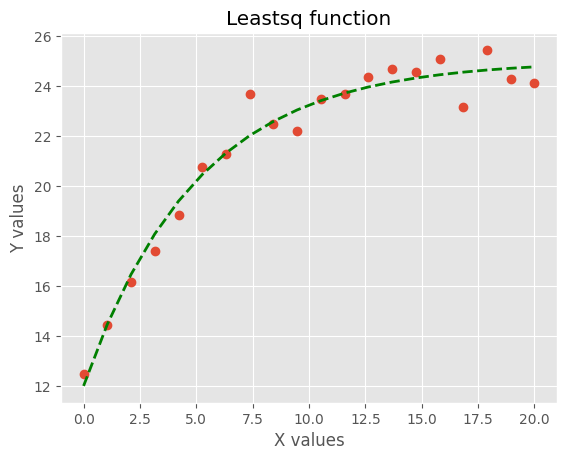

In [17]:
## Compute ODES
def function(xs, t, ps):
    """Receptor synthesis-internalization model."""
    try:
        a = ps['a'].value
        b = ps['b'].value
    except:
        a, b = ps
    x = xs

    return a - b*x

def ODE(t, x0, ps):
    """
    Solution with initial condition x(0) = x0
    """
    x = odeint(function, x0, t, args=(ps,))
    return x

def residual(ps, ts, data): 
    x0 = ps['x0'].value ## Obtain the residual value
    model = ODE(ts, x0, ps) ## Create de model 
    return (model - data).ravel() 

a = 5 
b = 0.2 ##Slope
true_params = [a, b]
x0 = 12.0 ## (initial value)

t = np.linspace(0, 20, 20) ## Datapoints
data = ODE(t, x0, true_params) 
data += np.random.normal(size=data.shape)

# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0]), min=0, max=100)
params.add('a', value= 1.0, min=0, max=10)
params.add('b', value= 1.0, min=0, max=10)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq') ## This step minimize the function trying to find the optimal value
final = data + result.residual.reshape(data.shape) 

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '--', linewidth=2, c='green');
plt.ylabel("Y values")
plt.xlabel("X values")
plt.title("Leastsq function")

# display fitted statistics
report_fit(result)